In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt  


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

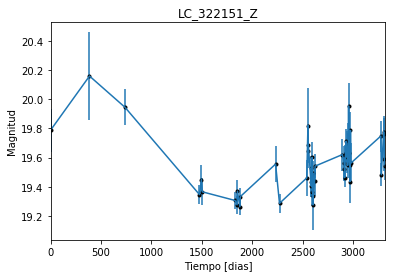

In [2]:
data = np.genfromtxt('LC_322151_Z.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_322151_Z')
plt.savefig("LC_322151_Z.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

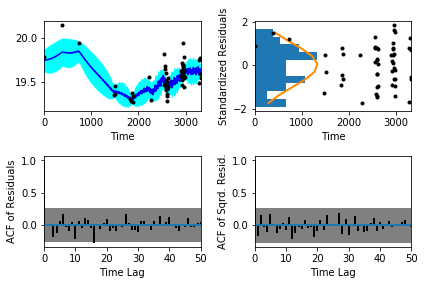

In [5]:
sample.assess_fit()

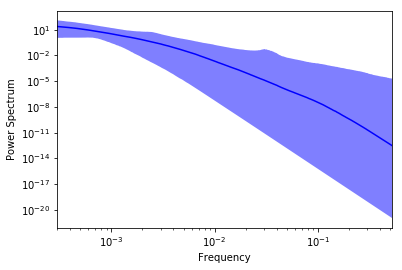

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

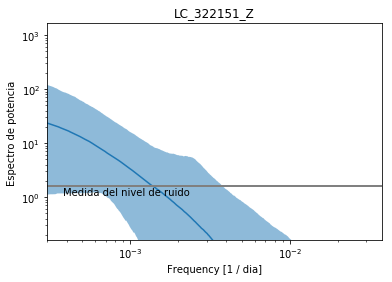

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_322151_Z')
plt.savefig("Medida del nivel de ruido_Z.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_322151_Z')

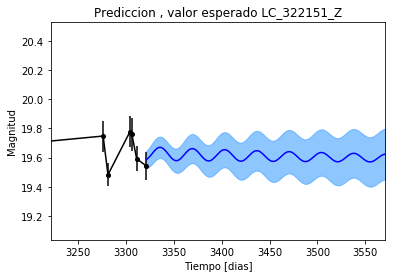

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_322151_Z')

Text(0.5,1,'Prediccion, Caminos simulados_LC_322151_Z')

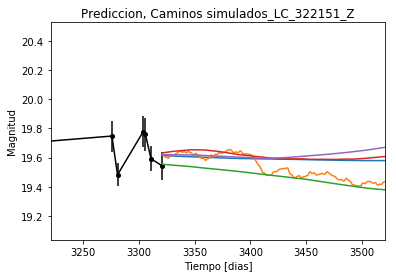

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados_LC_322151_Z')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


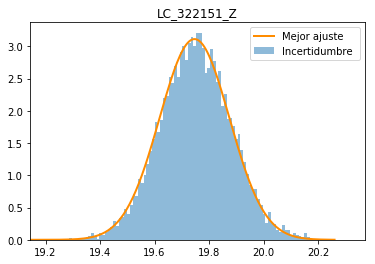

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_322151_Z')
plt.savefig("Mejor_ajuste_LC_322151_Z.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_322151_Z')

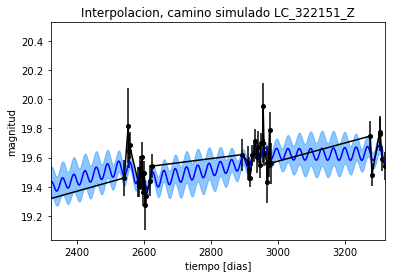

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_322151_Z')

Text(0.5,1,'Interpolacion, camino simulado LC_322151_Z')

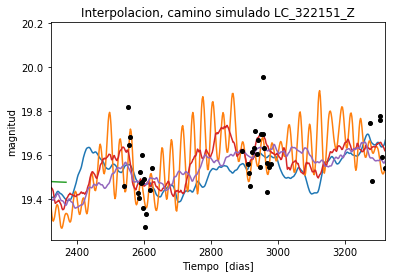

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_322151_Z')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 394.681276481
Median: 0.00502585816828
Standard deviation: 0.174867484036
68% credibility interval: [ 0.00053515  0.12454553]
95% credibility interval: [  3.23428189e-04   6.82607929e-01]
99% credibility interval: [  3.05392396e-04   9.65149913e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 632.718881622
Median: 0.00111926780608
Standard deviation: 0.0799132644893
68% credibility interval: [ 0.00037407  0.02342823]
95% credibility interval: [ 0.00031033  0.23069063]
99% credibility interval: [  3.03364597e-04   5.71264614e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 427.740179011
Median: 0.0200809186517
Standard

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 707.766568281
Median: 57.3919622716
Standard deviation: 1.75637226024
68% credibility interval: [ 55.37579085  58.70249285]
95% credibility interval: [ 52.98015832  59.73464636]
99% credibility interval: [ 51.0028684   60.29166818]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 349.969517434
Median: 0.450715833865
Standard deviation: 2.12954933714
68% credibility interval: [ 0.03958106  3.59085774]
95% credibility interval: [ 0.01247336  6.9763676 ]
99% credibility interval: [  8.82801068e-03   1.03387845e+01]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 862.713075456
Median: 0.178558031324
Standard deviation: 9.33116827179
68% credibility interval: [  2.56843235e-03   7.07169232e+00]
95% credibility interv

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 20020.0324912
Median: 1.9859313684e-29
Standard deviation: 3.69244739917e+28
68% credibility interval: [  1.08050897e-50   2.16568748e-09]
95% credibility interval: [  2.02817952e-106   2.34564926e+002]
99% credibility interval: [  3.97168374e-111   5.96027752e+018]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 1050.23703285
Median: 19.5852391301
Standard deviation: 0.12902949376
68% credibility interval: [ 19.48758825  19.70140257]
95% credibility interval: [ 19.35473041  19.86986683]
99% credibility interval: [ 19.18959579  19.98496226]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 331.541544684
Median: 0.00527285031683
Standard deviation: 0.237002892179
68% credibility interval: [ 0.          0.30293843]
95% credibility interval: [ 0.          0.88535724]
99% credibility interval: [ 0.          1.00828723]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 331.541544684
Median: 0.00527285031683
Standard deviation: 0.237002892179
68% credibility interval: [ 0.          0.30293843]
95% credibility interval: [ 0.          0.88535724]
99% credibility interval: [ 0.          1.00828723]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 552.538465599
Median: 0.0
Standard deviation: 0.000617366631789
68% 

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 707.766568281
Median: 57.3919622716
Standard deviation: 1.75637226024
68% credibility interval: [ 55.37579085  58.70249285]
95% credibility interval: [ 52.98015832  59.73464636]
99% credibility interval: [ 51.0028684   60.29166818]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 2182.67731567
Median: 0.0424605856318
Standard deviation: 0.0589725682049
68% credibility interval: [ 0.02266865  0.08196958]
95% credibility interval: [ 0.01246606  0.18245789]
99% credibility interval: [ 0.00791972  0.32325031]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 3123.78289965
Median: 1.06003245409
Standard deviation: 0.175865109384
68% credibility interval: [ 0.90601537  1.24463075]
95% credibility interval: [ 0.77156683  1.46873246]
99% credibility interval: [ 0.68990698  1.62600693]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 1816.83220402
Median: 4.90404006445e-05
Standard deviation: 0.268951565288
68% credibility interval: [  8.45506872e-08   1.04355775e-02]
95% credibility interval: [  1.15976358e-09   5.30441766e-01]
99% credibility interval: [  9.06681676e-22   1.76296278e+00]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 394.681276481
Median: (-0.0315783981989-4.55264218993j)
Standard deviation: 1.85059816266
68% credibility interval: [-0.78254265+0.j         -0.00336244-0.21748488j]
95% credibility interval: [ -4.28895211e+00+0.j          -2.03215925e-03-0.00029057j]
99% credibility interval: [ -6.06421575e+00+0.j          -1.91883702e-03-0.00288993j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 632.718881622
Median: (-0.00703256703396+0.0666995327325j)
Standard deviation: 1.57150617568
68% credibility interval: [-0.14720393+0.11164871j -0.00235036+0.00033651j]
95% credibility interval: [-1.44947195 +2.58809900e+00j -0.00194986 +9.20452002e-04j]
99% credibility interval: [ -3.58936143e+00+5.07282981j  -1.90609598e-03+0.2267359j ]
P